In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# CLASSIFICATION

# Training and Visualizing a Decision Tree

In [3]:
# Loading iris dataset

iris = load_iris()
X = iris.data[:, 2:] # petal length, petal width
y = iris.target

# Training

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

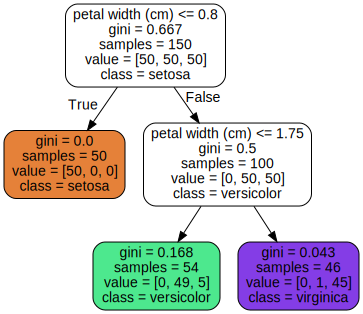

In [4]:
# Visualization of a trained Decision Tree with export_graphviz()

export_graphviz(tree_clf, out_file="iris_tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names, rounded=True, filled = True)

image_path = pathlib.Path().absolute()
Source.from_file(os.path.join(image_path,"iris_tree.dot"))

# Estimating Class Probabilities

In [5]:
# Class probabilities for a flower whose petals are 5 cm long and 1.5 cm wide
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
# Predicting its class
tree_clf.predict([[5,1.5]])

array([1])

# REGRESSION

In [7]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.rand(m,1) / 10

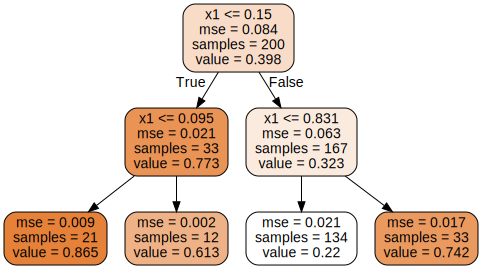

In [8]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X,y)

# Visualization 

export_graphviz(tree_reg, out_file="tree_reg.dot",
                feature_names=["x1"], rounded=True, filled = True)

Source.from_file(os.path.join(image_path,"tree_reg.dot"))

In [9]:
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

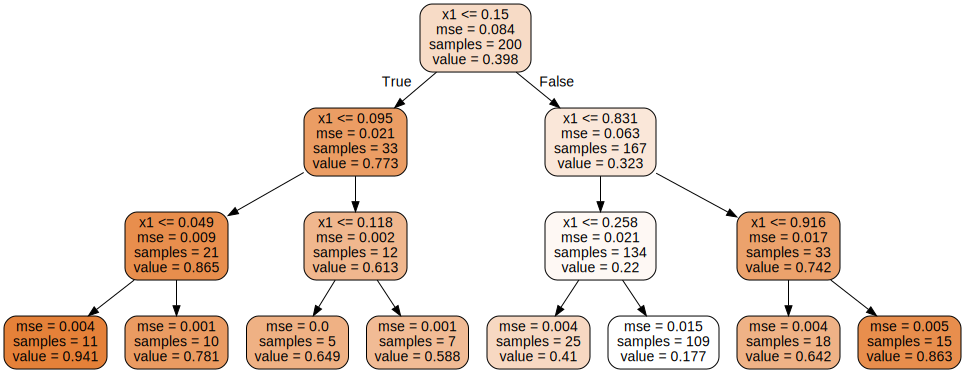

In [10]:
export_graphviz(tree_reg2, out_file="tree_reg2.dot",
                feature_names=["x1"], rounded=True, filled = True)

Source.from_file(os.path.join(image_path,"tree_reg2.dot"))

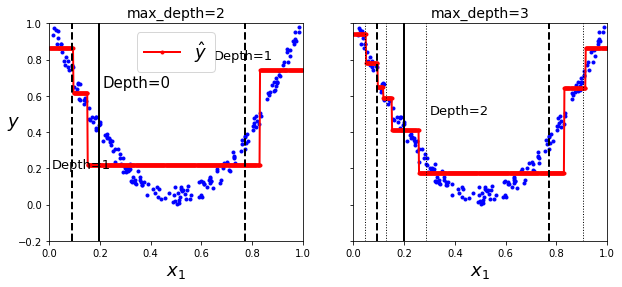

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

In [12]:
tree_reg.predict([[0.2]])

array([0.22015219])

In [13]:
tree_reg2.predict([[0.2]])

array([0.41039908])